## 交叉验证
>交叉验证是用来观察模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份
作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此
用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量。

In [40]:
## 回归树
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score #导入交叉验证函数
from sklearn.tree import DecisionTreeRegressor # 导入回归树类

"""
值得一提的是，虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误
差“（neg_mean_squared_error）。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，
均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的
均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。
评估标准：
mse  --  均方误差越小越好
R平方(回归默认返回)   越接近1越好
"""

boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0) # 实例化
cross_val_score(regressor,boston.data,boston.target,cv = 10,scoring = 'neg_mean_squared_error')
# 参数含义：
## cv 表示循环的次数，10的意思是将样本分成10份，每次选择不同的一份作为验证集，一共循环了10次
## scoring  表示返回的评价衡量指标  默认是R平方，neg_mean_squared_error  负均方误差


array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [41]:
cross_val_score(regressor,boston.data,boston.target,cv = 10)

array([ 0.48141081,  0.60461936, -1.32633384,  0.54154398,  0.75705408,
        0.33934083,  0.18757206,  0.40679147, -1.9602183 , -0.32967889])

## 实例：一维回归的图像绘制

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

### 创建一条含有噪声的正弦曲线
* 需要注意的是在使用fit 和predict 接口的时候，X要是二维的数据(data)，Y要是一维的数据(target)
>我们的基本思路是，先创建一组随机的，分布在0~5上的横坐标轴的取值(x)，然后将这一组值放到sin函
数中去生成纵坐标的值(y)，接着再到y上去添加噪声。全程我们会使用numpy库来为我们生成这个正弦曲线


In [58]:
seed = np.random.RandomState(1) # 生成随机种子
X = np.sort(10*seed.rand(80,1),axis=0)  # 1~ 10之间的随机数，80个点
Y = np.sin(X).ravel()  #降维，由二维变成一维
# 给Y值增加噪点，不要那么符合正弦规律
Y[::5] += (0.5 - seed.rand())
Y

array([-0.38216234,  0.18186502,  0.19246116,  0.27046493,  0.38069505,
        0.09571096,  0.50865808,  0.75157212,  0.79764833,  0.83242431,
        0.47054745,  0.85846032,  0.96363458,  0.98084381,  0.98419397,
        0.60279393,  0.99464756,  0.99467575,  0.99657853,  0.99188188,
        0.57441985,  0.91703368,  0.88987457,  0.85487584,  0.46720426,
       -0.05250462,  0.26078888,  0.20400886,  0.11799142,  0.00735081,
       -0.39686933, -0.30887942, -0.32977567, -0.73528161, -0.74141444,
       -1.22421862, -0.84157905, -0.85659154, -0.85804733, -0.86759856,
       -1.26025854, -0.97287322, -0.97939703, -0.906236  , -0.81430595,
       -1.18145793, -0.78022032, -0.64137341, -0.51585831, -0.40559977,
       -0.76361468,  0.34736639,  0.40912032,  0.48395623,  0.53879805,
        0.16624262,  0.59364905,  0.59722821,  0.61376149,  0.65516295,
        0.41233165,  0.8287076 ,  0.93148404,  0.93849925,  0.94078405,
        0.61594083,  0.98824748,  0.97591245,  0.88125986,  0.61

In [89]:
## 训练模型
regressor1 = DecisionTreeRegressor(max_depth = 2)
regressor2 = DecisionTreeRegressor(max_depth = 5)
model1 = regressor1.fit(X,Y)
model2 = regressor2.fit(X,Y)

In [90]:
# 测试集导入模型，预测结果
X_test = np.arange(0,10,0.01)[:,np.newaxis]  #生成测试数据集，并升维（一维变二维）
# 使用测试集，测试模型
Y_test_1 = model1.predict(X_test)
Y_test_2 = model2.predict(X_test)

## np.newaxis  增维用法

In [66]:
a = np.arange(1,100,10)
a

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [70]:
# 可以使用reshape增维
a.reshape(-1,1) # 规定一列，自动计算行数
# 使用np.newaxis 增维
a[:,np.newaxis].shape,a[np.newaxis,:].shape

((10, 1), (1, 10))

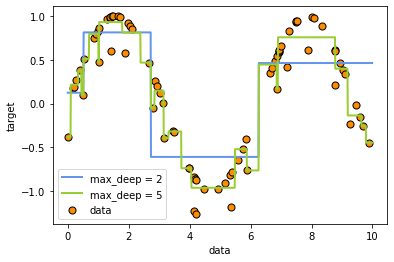

In [97]:
### 开始绘图
plt.scatter(X,Y,edgecolors='black',color = 'darkorange',s=50,label='data')  #散点图
plt.plot(X_test,Y_test_1,color = 'cornflowerblue',linewidth=2,label = 'max_deep = 2')
plt.plot(X_test,Y_test_2,color = 'yellowgreen',linewidth=2,label = 'max_deep = 5')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()